<a href="https://colab.research.google.com/github/DefaultaideN/EncodeBoosting/blob/main/visualize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow==2.4.1

In [ ]:
#Load some packages
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

print("Tensorflow Edition:", tf.__version__)
seed = 2020
np.random.seed(seed)
tf.random.set_seed(seed)
print("Packages Loaded!")

Tensorflow Edition: 2.4.1
Packages Loaded!


In [ ]:
!nvidia-smi

Tue Jan 26 12:41:18 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   67C    P8    11W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
#Load data from Google Drive
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
#Define paths
DATA_PATH = '/content/drive/MyDrive/paper_file/data/'
SAVE_PATH = '/content/drive/MyDrive/paper_file/model_trained/'

In [ ]:
#Load pretrained models
model_loaded = []
for i in range(4):
  model = keras.models.load_model(SAVE_PATH + 'model_' + str(i))
  model_loaded.append(model)

In [ ]:
model_loaded

In [ ]:
#Load data and set parameters
import shutil
import os
from tensorflow.keras.preprocessing.image import load_img
path = '/content/drive/MyDrive/paper_file/selected_data'
image_list = []
image_files = os.listdir(path)

for image in image_files:
  image_array = np.array(load_img(path + '/' + image, target_size=(224,224)))
  image_list.append(image_array)

image_array_list = np.asarray(image_list)

In [ ]:
!pip install tf_keras_vis

In [ ]:
#Code for heatmap

def get_heat_map(model, image_in, image_show, flag, label):

  #flag: with title or not
  from matplotlib import cm
  import tf_keras_vis
  from tf_keras_vis.gradcam import Gradcam
  from tf_keras_vis.saliency import Saliency
  from tensorflow.keras.preprocessing.image import load_img
  from tensorflow.keras.applications.resnet50 import preprocess_input
  #from tensorflow.keras.applications.efficientnet import preprocess_input
  from tf_keras_vis.utils import normalize

  # Load images
  img_right = image_in 
  image = np.asarray([np.array(img_right)])

  # Preparing input data
  X = preprocess_input(image)
  plt.show()

  def loss(output):
      return (output[0][label])

  def model_modifier(m):
      m.layers[-1].activation = tf.keras.activations.linear
      return m

  saliency = Saliency(model, model_modifier = model_modifier, clone = False)
  gradcam = Gradcam(model, model_modifier = model_modifier, clone = False)

  cam = gradcam(loss, X, penultimate_layer=-1)
  cam = normalize(cam)

  saliency_map = saliency(loss, X ,smooth_samples=20, smooth_noise=0.20)
  saliency_map = normalize(saliency_map)

  # Plot
  heatmap = np.uint8(cm.jet(cam)[..., :3] * 255)
  original = np.uint8(cm.gray(cam[..., 0])[..., :3] * 255)
  '''
  f, ax = plt.subplots(1, 3, figsize=(10, 10))

  ax[0].imshow(image_show)
  ax[1].imshow(saliency_map[0])
  ax[2].imshow(image_show)
  ax[2].imshow(heatmap[0], alpha=0.5)
  if flag:
    ax[0].set_title('Original Picture')
    ax[1].set_title('Saliency Map')
    ax[2].set_title('GradCAM')
  '''
  return image_show, saliency_map[0], heatmap[0]

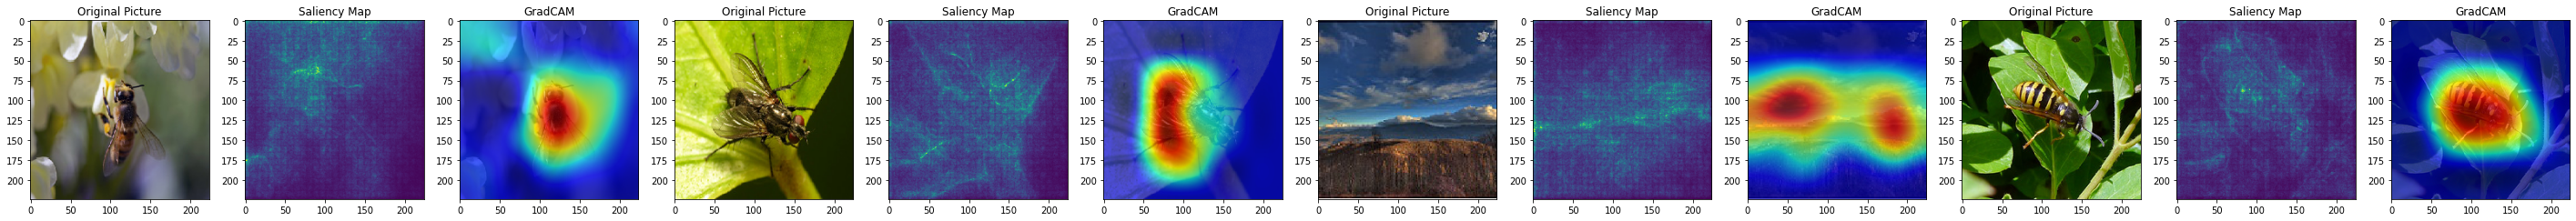

In [ ]:
#Plot(12 version)
from tensorflow.keras.applications.resnet50 import preprocess_input
image_array_list_processed = preprocess_input(image_array_list)
beedict = {0:'bee', 1:'insect', 2:'other', 3:'wasp'}
beereverse = {'bee':0, 'insect':1, 'other':2, 'wasp':3}
model_index = 3
pred_class = [beedict[i] for i in np.argmax(model_loaded[model_index].predict(image_array_list_processed), axis=1)]

im_list = []
sm_list = []
hm_list = []
  

for i in range(image_array_list_processed.shape[0]):
  
  im, sm, hm = get_heat_map(model_loaded[model_index], image_array_list_processed[i], image_array_list[i], 1, beereverse[pred_class[i]])
  im_list.append(im)
  sm_list.append(sm)
  hm_list.append(hm)

f, ax = plt.subplots(1, 12, figsize=(50, 50))
plt.title('ENB5')
for i in range(image_array_list_processed.shape[0]):
  
  index = i*3
  ax[index].imshow(im_list[i])
  ax[index+1].imshow(sm_list[i])
  ax[index+2].imshow(im_list[i])
  ax[index+2].imshow(hm_list[i], alpha=0.7)

  ax[index].set_title('Original Picture')
  ax[index+1].set_title('Saliency Map')
  ax[index+2].set_title('GradCAM')
plt.savefig('ResNet50_output.pdf')

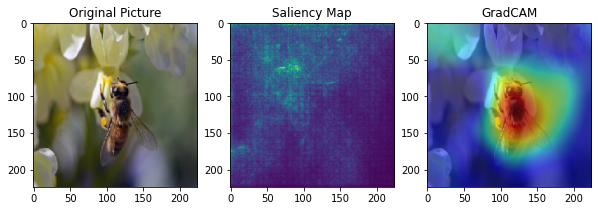

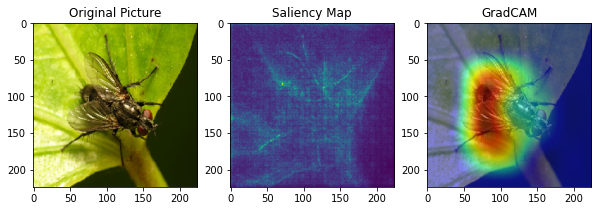

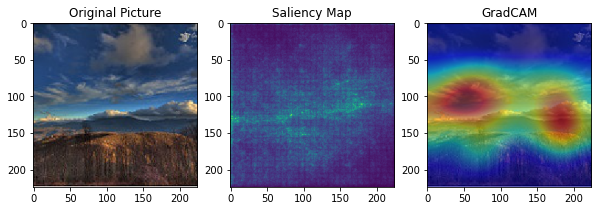

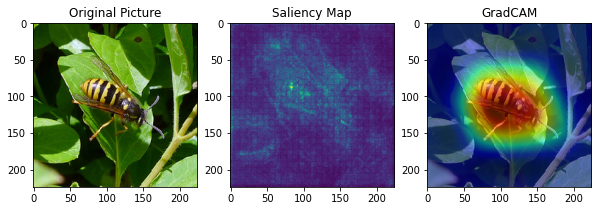

In [ ]:
'''
#Prepare to plot: preprocess
import tensorflow.keras.applications.resnet50
from tensorflow.keras.applications.resnet50 import preprocess_input
image_array_list_processed = preprocess_input(image_array_list)
beedict = {0:'bee', 1:'insect', 2:'other', 3:'wasp'}
beereverse = {'bee':0, 'insect':1, 'other':2, 'wasp':3}
pred_class = [beedict[i] for i in np.argmax(model_loaded[3].predict(image_array_list_processed), axis=1)]
for i in range(image_array_list_processed.shape[0]):
  im, sm, hm = get_heat_map(model_loaded[3], image_array_list_processed[i], image_array_list[i], 1, beereverse[pred_class[i]])
  f, ax = plt.subplots(1, 3, figsize=(10, 10))

  ax[0].imshow(im)
  ax[1].imshow(sm)
  ax[2].imshow(im)
  ax[2].imshow(hm, alpha=0.5)

  ax[0].set_title('Original Picture')
  ax[1].set_title('Saliency Map')
  ax[2].set_title('GradCAM')
'''